# MTG Power-Creep: Analysis & Visualization
In the first notebook file, we selected the rows that are exploitable. Each selected card respects the following conditions:
* Is in english
* Is from a core set
* Is a creature
* Can be opened in a booster
* Has an exploitable power & toughness (no 'Nan', '*', or '0' toughness)

We then created a dataframe containing summary values on each one of the 20 core sets. The fields for each set are:
* set: set code
* name: set full name
* release: release date
* display_str: a string containing the set code and date for our plots
* avg_cmc: avg cmc of creatures in this set
* avg_power: avg power of creatures in this set
* avg_toughness: avg toughness of creatures in this set
* avg_effectiveness: positive or negative percentage translating how much better or worse the stats of an average creature of this set is compared to what is expected. The expected stats of a creature is calculated as the average stats of a creature with this exact mana cost in any core set.

In [1]:
import pandas as pd

sets = pd.read_csv("sets_summary.csv")
sets

,set,name,display_str,release_date,avg_cmc,avg_power,avg_toughness,avg_effectiveness
0,lea,Limited Edition Alpha,LEA (1993),1993-08-05,3.423529,2.258824,2.988235,-0.508065
1,leb,Limited Edition Beta,LEB (1993),1993-10-04,3.423529,2.258824,2.988235,-0.508065
2,2ed,Unlimited Edition,2ED (1993),1993-12-01,3.423529,2.258824,2.988235,-0.508065
3,3ed,Revised Edition,3ED (1994),1994-04-01,3.350515,2.237113,3.000000,-0.293019
4,4ed,Fourth Edition,4ED (1995),1995-04-01,3.444444,2.159722,2.763889,-8.141629
5,5ed,Fifth Edition,5ED (1997),1997-03-24,3.393064,2.132948,2.566474,-8.346933
6,6ed,Classic Sixth Edition,6ED (1999),1999-04-21,3.380952,2.214286,2.611111,-2.079312
7,7ed,Seventh Edition,7ED (2001),2001-04-11,3.489362,2.276596,2.617021,-3.311375
8,8ed,Eighth Edition,8ED (2003),2003-07-28,3.417219,2.317881,2.655629,0.219854
9,9ed,Ninth Edition,9ED (2005),2005-07-29,3.445860,2.286624,2.630573,-2.795058


Text(0.5, 1.0, 'Evolution of creature effectiveness over time')

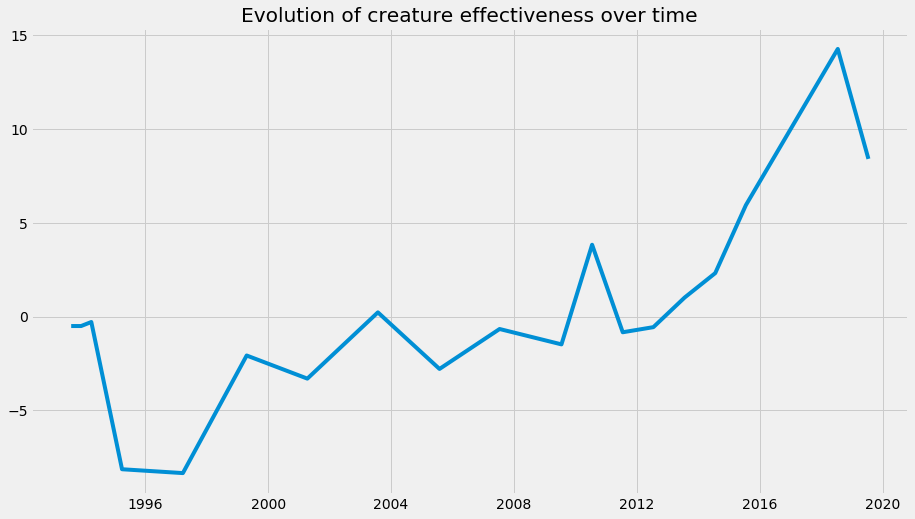

In [78]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use("fivethirtyeight")

# sets["avg_cmc"].plot.line()
# sets["avg_power"].plot.line()
# sets["avg_toughness"].plot.line()

# graph = sets["avg_effectiveness"].plot(
#     x = "display_str", use_index = False, figsize = (14, 8), title = "Evolution of effectiveness over time",
#     legend = True, rot = 45, xlim = (0, 20)
# )
#graph.tick_params(axis = "both", which = "major", labelsize = 18)
#graph.set_xticklabels(labels = sets["display_str"])
#plt.tight_layout()

# sets["avg_effectiveness"].plot(x = "release_date")

fig, ax = plt.subplots(figsize = (14, 8))
graph = ax.plot(sets.release_date, sets.avg_effectiveness)
plt.title("Evolution of creature effectiveness over time")
#plt.xticks([t.value for t in sets.release_date], sets.release_date, rotation = 45)



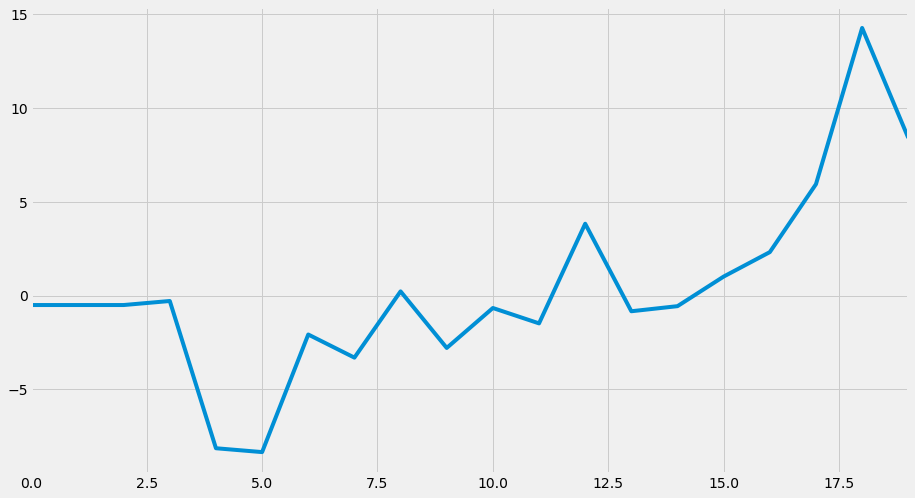

In [82]:
graph = sets["avg_effectiveness"].plot(x = sets["release_date"], figsize = (14, 8))